# Diamond Price Prediction

## Importing the libraries

In [30]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import metrics

## Loading the data

In [3]:
#Reading and converting csv data in to data frame
df_diamonds=pd.read_csv('Diamonds Prices2022.csv')

In [4]:
#Checking the first 5 rows of the dataframe
df_diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## EDA

In [5]:
#Shape of the dataframe
df_diamonds.shape

(53943, 11)

In [6]:
#Summary of the dataframe 
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
#Number of duplicate rows
print(f'The number of duplicate rows : {df_diamonds.duplicated().sum()}') 

The number of duplicate rows : 0


### Removing unnecessary columns and false values

In [8]:
#Removing the unnecessary column 'Unnamed'
df_diamonds = df_diamonds.drop(["Unnamed: 0"], axis=1)
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
#Removing dimentionless diamonds
df_diamonds = df_diamonds.drop(df_diamonds[df_diamonds["x"]==0].index)
df_diamonds = df_diamonds.drop(df_diamonds[df_diamonds["y"]==0].index)
df_diamonds = df_diamonds.drop(df_diamonds[df_diamonds["z"]==0].index)
df_diamonds.shape

(53923, 10)

### Checking for outliers

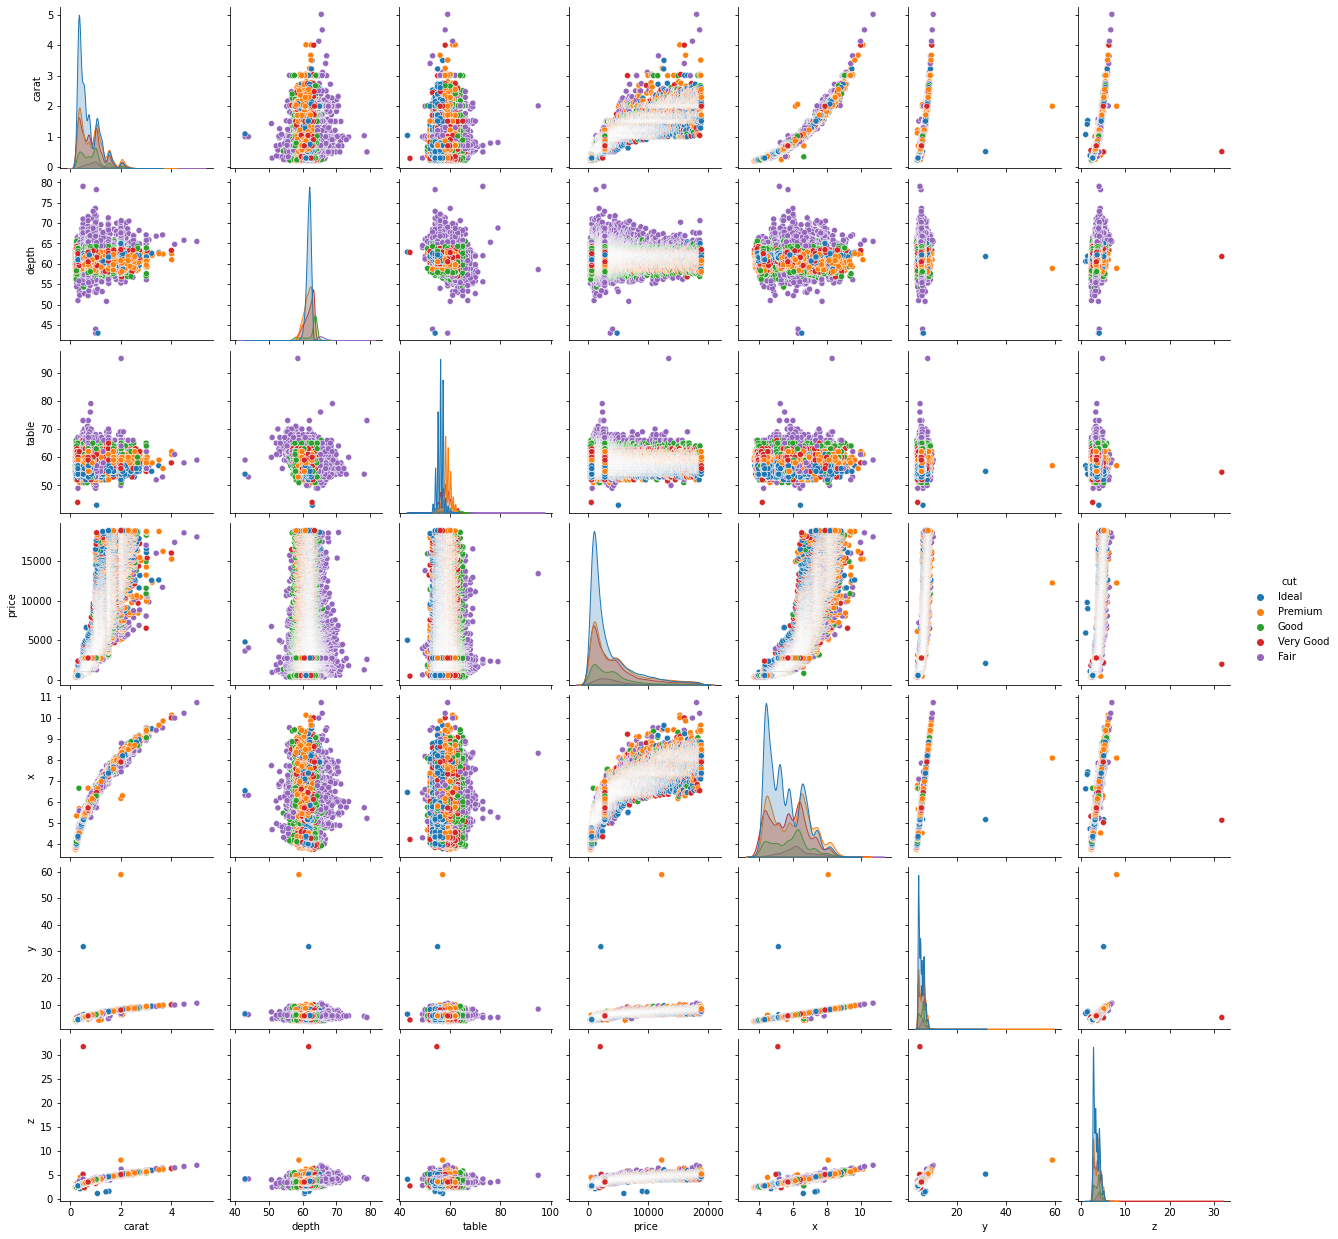

In [10]:
ax=sns.pairplot(df_diamonds, hue= "cut")

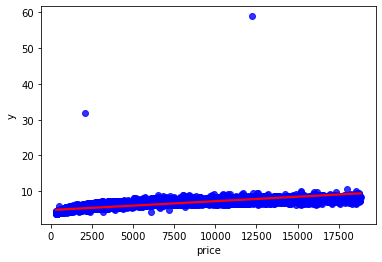

In [11]:
ax= sns.regplot(x="price",y="y",data=df_diamonds,fit_reg=True, scatter_kws={"color": "blue"},line_kws={"color":"red"})

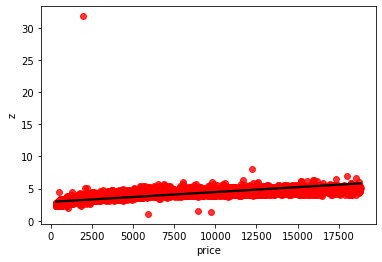

In [12]:
ax= sns.regplot(x="price",y="z",data=df_diamonds,fit_reg=True, scatter_kws={"color": "red"},line_kws={"color":"black"})

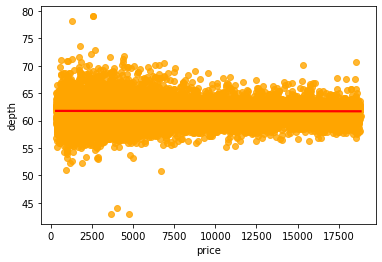

In [13]:
ax= sns.regplot(x="price",y="depth",data=df_diamonds,fit_reg=True, scatter_kws={"color": "orange"},line_kws={"color":"red"})

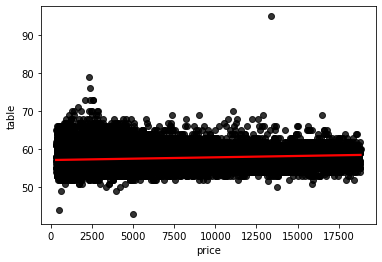

In [14]:
ax= sns.regplot(x="price",y="table",data=df_diamonds,fit_reg=True, scatter_kws={"color": "black"},line_kws={"color":"red"})

In [15]:
#Dropping the outliers. 
df_diamonds = df_diamonds[(df_diamonds["depth"]<75)&(df_diamonds["depth"]>45)]
df_diamonds = df_diamonds[(df_diamonds["table"]<80)&(df_diamonds["table"]>40)]
df_diamonds = df_diamonds[(df_diamonds["x"]<30)]
df_diamonds = df_diamonds[(df_diamonds["y"]<30)]
df_diamonds = df_diamonds[(df_diamonds["z"]<30)&(df_diamonds["z"]>2)]
df_diamonds.shape

(53910, 10)

### Analyzing Numerical variables

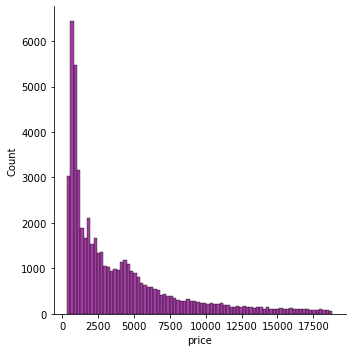

In [16]:
sns.displot(df_diamonds['price'], color='purple')

<AxesSubplot:>

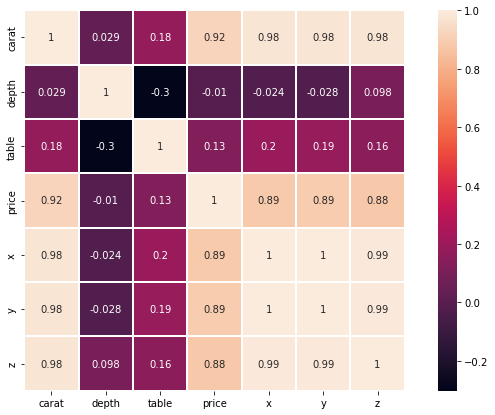

In [17]:
corr = df_diamonds.corr()
f, ax = plt.subplots(figsize=(12,7))
sns.heatmap(data=corr, square=True , annot=True, cbar=True,linewidth=2)

### Analyzing categorical variables

In [18]:
#List of categorical variables
s=(df_diamonds.dtypes =="object")
object_cols=list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


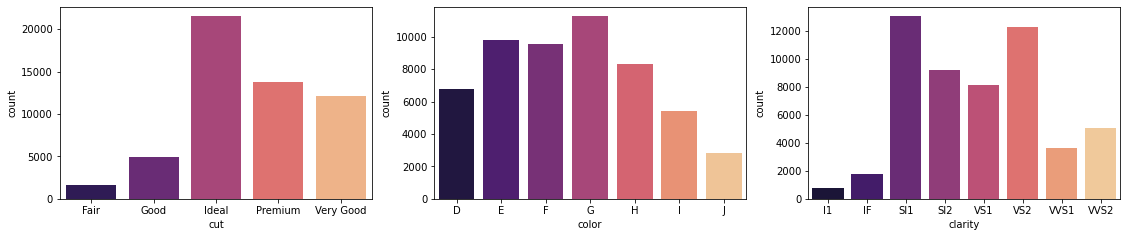

In [19]:
i=1
plt.figure(figsize=(19, 12))
for c in object_cols:
    plt.subplot(3, 3, i)
    sns.countplot(x=df_diamonds[c].sort_values(),palette='magma')
    i+=1

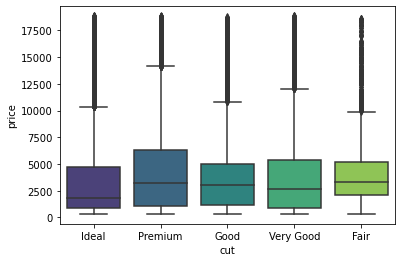

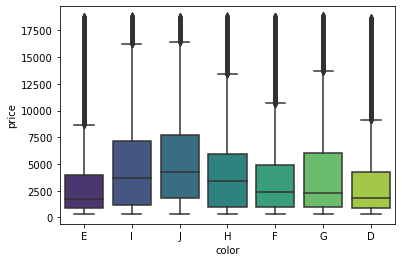

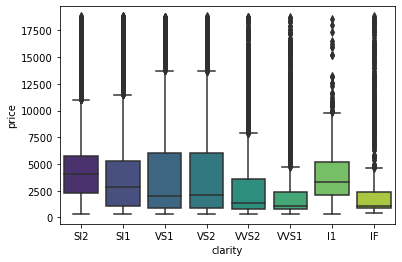

In [20]:
#boxplot for each  col in catgorical_col
for col in object_cols:
    sns.boxplot(x=col,y='price',data=df_diamonds,palette='viridis')
    plt.show()

In [21]:
#Making a copy to avoid changing original data 
label_data = df_diamonds.copy()

#Using one-hot encoding to convert the categorical variables into numerical
label_data = pd.get_dummies(data = label_data, drop_first=True)
label_data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,0,1,0,...,0,0,0,0,0,1,0,0,0,0
53940,0.71,60.5,55.0,2756,5.79,5.74,3.49,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53941,0.71,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Application of Machine Learning Algorithms

In [22]:
X = label_data.drop(['price','table','depth'],axis=1)
Y = label_data['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=40)

### Linear Regression

In [33]:
#linear regression
Lreg = LinearRegression()
Lreg.fit(X_train,y_train)
prediction1 = Lreg.predict(X_test)

rmse_Lreg = np.sqrt(mean_squared_error(y_test, prediction1))
print('RMSE value is = {}'.format(rmse_Lreg))

MAE_Lreg = mean_absolute_error(y_test, prediction1)
print('MAE value is = {}'.format(MAE_Lreg))

r2_Lreg = r2_score(y_test, prediction1)
print('R-squared value is {}'.format(r2_Lreg))

RMSE value is = 1135.2372195111182
MAE value is = 737.6173280025752
R-squared value is 0.9205540076388724


### Decision Tree

In [34]:
#Decision Tree
DTreg = DecisionTreeRegressor()
DTreg.fit(X_train,y_train)
prediction2 = DTreg.predict(X_test)

rmse_DTreg = np.sqrt(mean_squared_error(y_test, prediction2))
print('RMSE value is = {}'.format(rmse_DTreg))

MAE_DTreg = mean_absolute_error(y_test, prediction2)
print('MAE value is = {}'.format(MAE_DTreg))

r2_DTreg = r2_score(y_test, prediction2)
print('R-squared value is {}'.format(r2_DTreg))

RMSE value is = 882.0849391466973
MAE value is = 394.0889909107772
R-squared value is 0.9520355393358022


### Random Forest Regressor

In [35]:
#Random Forest Regression
RFreg = RandomForestRegressor()
RFreg.fit(X_train,y_train)
prediction3 = RFreg.predict(X_test)

rmse_RFreg = np.sqrt(mean_squared_error(y_test, prediction3))
print('RMSE value is = {}'.format(rmse_RFreg))

MAE_RFreg = mean_absolute_error(y_test, prediction3)
print('MAE value is = {}'.format(MAE_RFreg))

r2_RFreg = r2_score(y_test, prediction3)
print('R-squared value is {}'.format(r2_RFreg))

RMSE value is = 672.5355523178177
MAE value is = 307.8087912585055
R-squared value is 0.9721176582215492


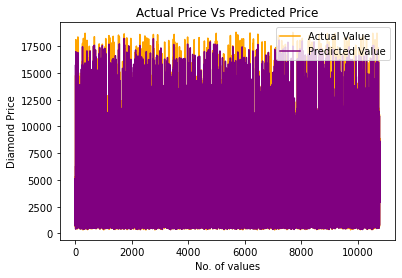

In [36]:
#comparing the actual and predicted values in a plot
y_test = list(y_test)
plt.plot(y_test, color = 'orange', label = 'Actual Value')
plt.plot(prediction3, color = 'purple', label = 'Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('No. of values')
plt.ylabel('Diamond Price')
plt.legend()
plt.show()

### Support Vector Regression

In [37]:
#Support Vector Regression
SVreg = SVR(kernel='rbf')
SVreg.fit(X_train,y_train)
prediction4 = SVreg.predict(X_test)

rmse_SVreg = np.sqrt(mean_squared_error(y_test, prediction4))
print('RMSE value is = {}'.format(rmse_SVreg))

MAE_SVreg = mean_absolute_error(y_test, prediction4)
print('MAE value is = {}'.format(MAE_SVreg))

r2_SVreg = r2_score(y_test, prediction4)
print('R-squared value is {}'.format(r2_SVreg))

RMSE value is = 2802.9064452433013
MAE value is = 1436.4162063778483
R-squared value is 0.5156983418353579


In [33]:
print('R-squared value for Linear Regression:',r2_Lreg)
print('R-squared value for Decision Tree Regression:',r2_DTreg)
print('R-squared value for Random Forest Regression:', r2_RFreg)
print('R-squared value for Support Vector Regression:', r2_SVreg)

R-squared value for Linear Regression: 0.9205540076388724
R-squared value for Decision Tree Regression: 0.952007845249639
R-squared value for Random Forest Regression: 0.9721736709916434
R-squared value for Support Vector Regression: 0.5156983418353579


In [39]:
Result= pd.DataFrame({'Actual Price':y_test,'Predicted Price By LinReg':prediction1,'Predicted Price By DeciTree':prediction2,'Predicted Price By RandForest':prediction3,'Predicted Price By SuppVec':prediction4})
Result

,Actual Price,Predicted Price By LinReg,Predicted Price By DeciTree,Predicted Price By RandForest,Predicted Price By SuppVec
0,4004,4573.996147,4672.0,4224.04,3890.163513
1,5317,5828.932042,5225.0,5103.44,3536.082889
2,643,541.679113,686.0,698.60,947.927451
3,773,554.249608,773.0,763.65,1389.420475
4,4712,5578.368138,5277.0,5126.19,4417.677481
...,...,...,...,...,...
10777,3545,4444.668394,3954.0,3969.91,3610.965646
10778,7755,8480.488466,7644.0,7683.85,5411.277232
10779,4201,3544.844598,4346.0,3864.56,4553.341116
10780,3093,3654.882067,2633.0,2902.20,3159.710377
